# Aprendizagem de Máquina I

## Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_sample_image

import time

In [2]:
flower = load_sample_image('flower.jpg')

In [3]:
flower

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [4]:
flower.shape

(427, 640, 3)

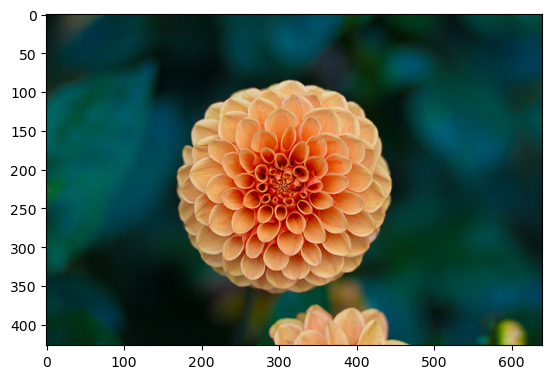

In [5]:
plt.imshow(flower)
plt.show()

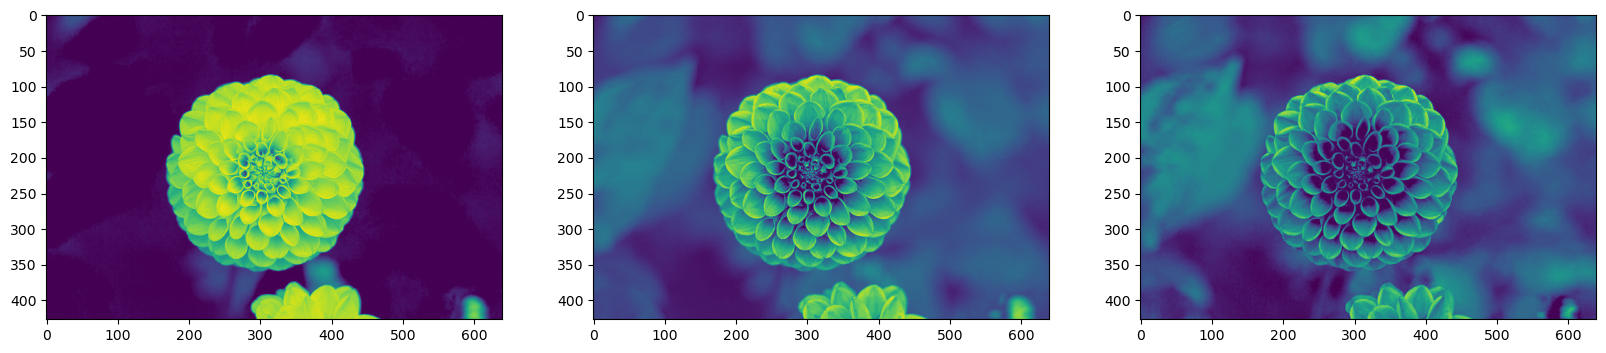

In [6]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.imshow(flower[:,:,0])

plt.subplot(1,3,2)
plt.imshow(flower[:,:,1])

plt.subplot(1,3,3)
plt.imshow(flower[:,:,2])

plt.show()

In [7]:
a, l, p = flower.shape

In [8]:
flower = flower/255

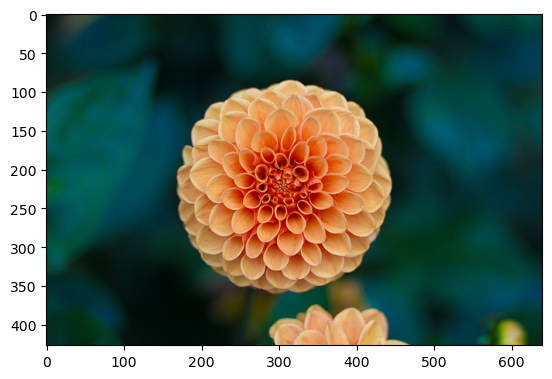

In [9]:
plt.imshow(flower)
plt.show()

In [10]:
flower_vec = np.reshape(flower, (a*l, p))

In [11]:
flower_vec.shape

(273280, 3)

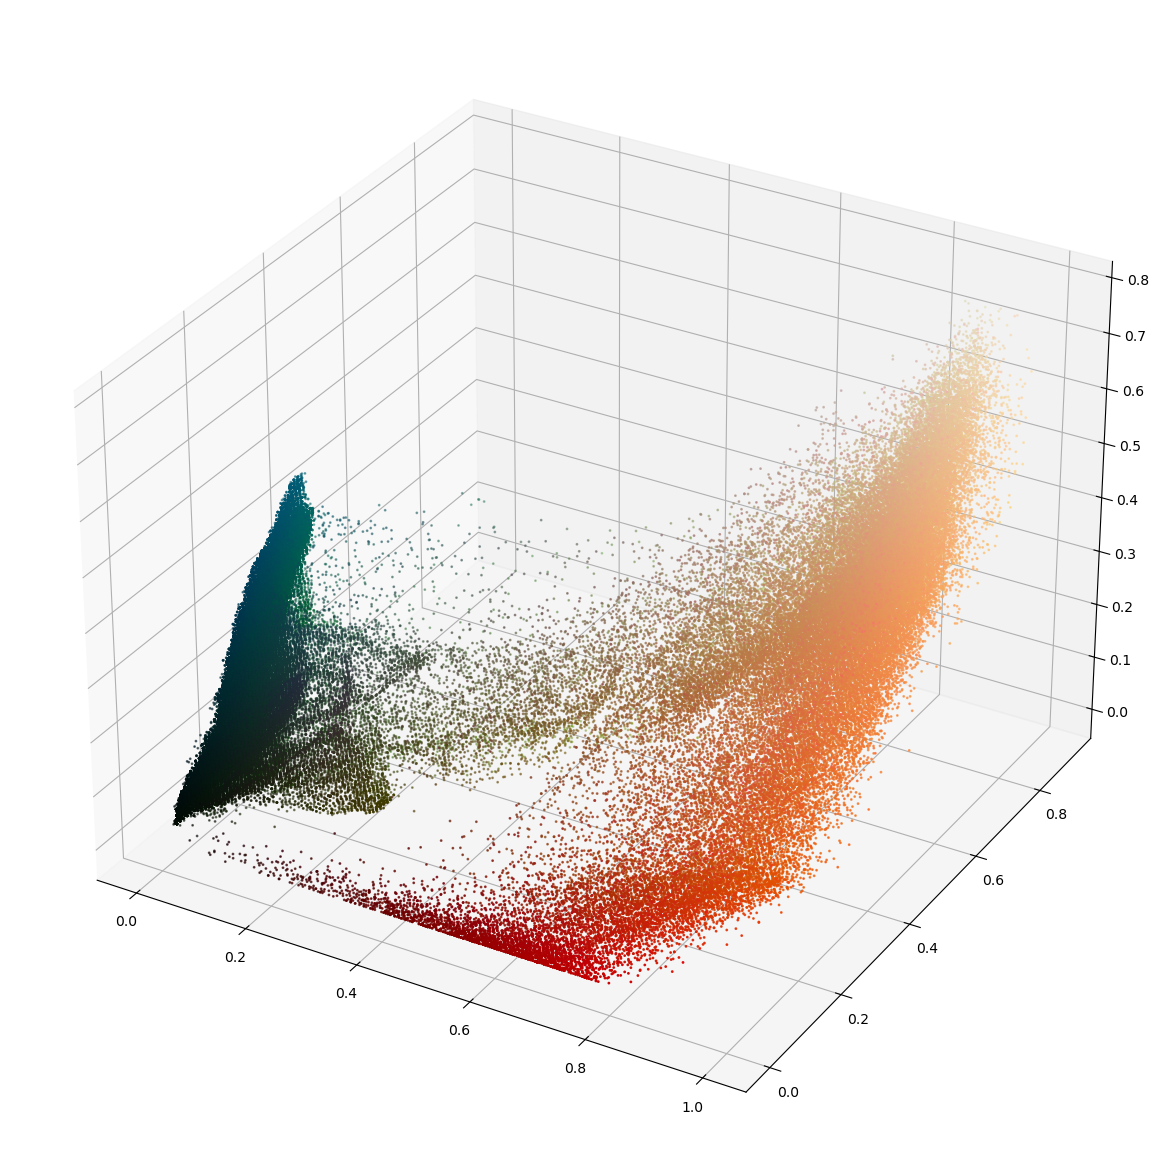

In [12]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(flower_vec[:,0], flower_vec[:,1], flower_vec[:,2], s = 1, c = flower_vec)

plt.show()

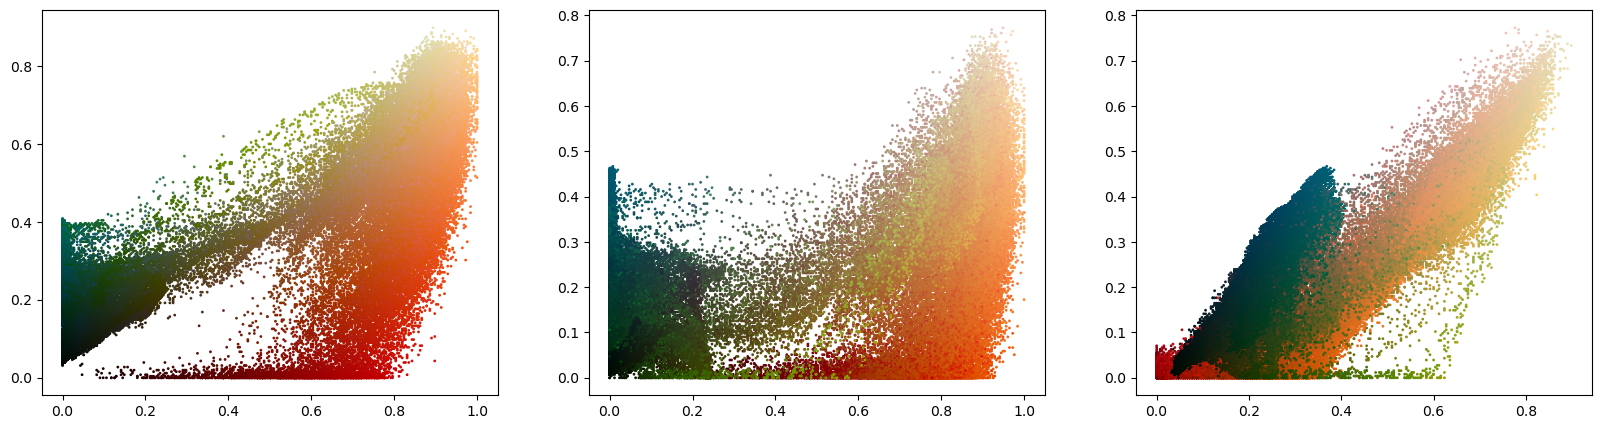

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(flower_vec[:,0], flower_vec[:,1], s = 1, c = flower_vec)

plt.subplot(1,3,2)
plt.scatter(flower_vec[:,0], flower_vec[:,2], s = 1, c = flower_vec)

plt.subplot(1,3,3)
plt.scatter(flower_vec[:,1], flower_vec[:,2], s = 1, c = flower_vec)

plt.show()

In [14]:
n_colors = 64
km = KMeans(n_clusters = n_colors)
km.fit(flower_vec)

c:\Users\hugom\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\hugom\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=64)

In [15]:
km.cluster_centers_.shape

(64, 3)

In [16]:
km.cluster_centers_

array([[0.91855903, 0.65050768, 0.39564604],
       [0.00224075, 0.2121648 , 0.25277135],
       [0.64935101, 0.19182891, 0.03113436],
       [0.01512856, 0.082626  , 0.0570664 ],
       [0.00193688, 0.28808969, 0.33766615],
       [0.67285687, 0.45294395, 0.2432297 ],
       [0.01482241, 0.1909329 , 0.09780647],
       [0.75704864, 0.31948539, 0.10855575],
       [0.90384869, 0.79826479, 0.63041645],
       [0.68979774, 0.02878335, 0.0140128 ],
       [0.08805107, 0.13812462, 0.09094869],
       [0.78125924, 0.49971233, 0.27122057],
       [0.00206907, 0.35073683, 0.33734672],
       [0.31142814, 0.31185808, 0.10623412],
       [0.86308785, 0.66109485, 0.4369023 ],
       [0.00589416, 0.24813121, 0.25339548],
       [0.0053419 , 0.21923278, 0.21587138],
       [0.43728291, 0.36063181, 0.17333645],
       [0.00445148, 0.32205795, 0.23903828],
       [0.02674767, 0.13803833, 0.11857197],
       [0.77456134, 0.56705513, 0.33567643],
       [0.79042381, 0.23585164, 0.02280936],
       [0.

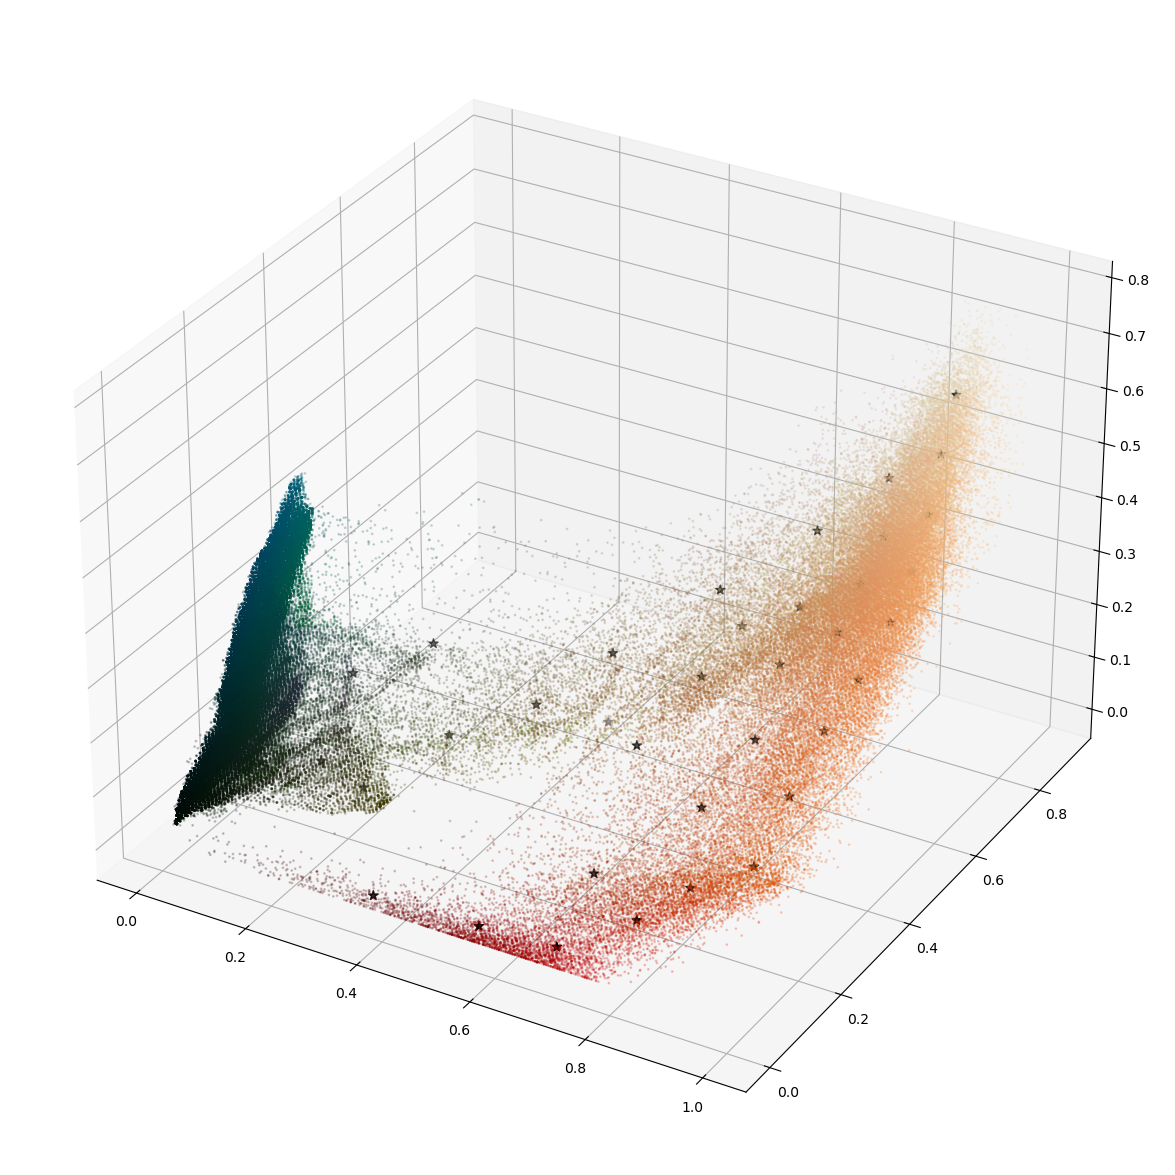

In [17]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(flower_vec[:,0], flower_vec[:,1], flower_vec[:,2], s = 1, c = flower_vec, alpha = 0.2)
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], s = 50, marker = '*', c = 'black')

plt.show()

In [18]:
km.labels_

array([3, 3, 3, ..., 6, 6, 6])

In [19]:
flower_vec.shape

(273280, 3)

In [20]:
km.cluster_centers_[km.labels_].shape

(273280, 3)

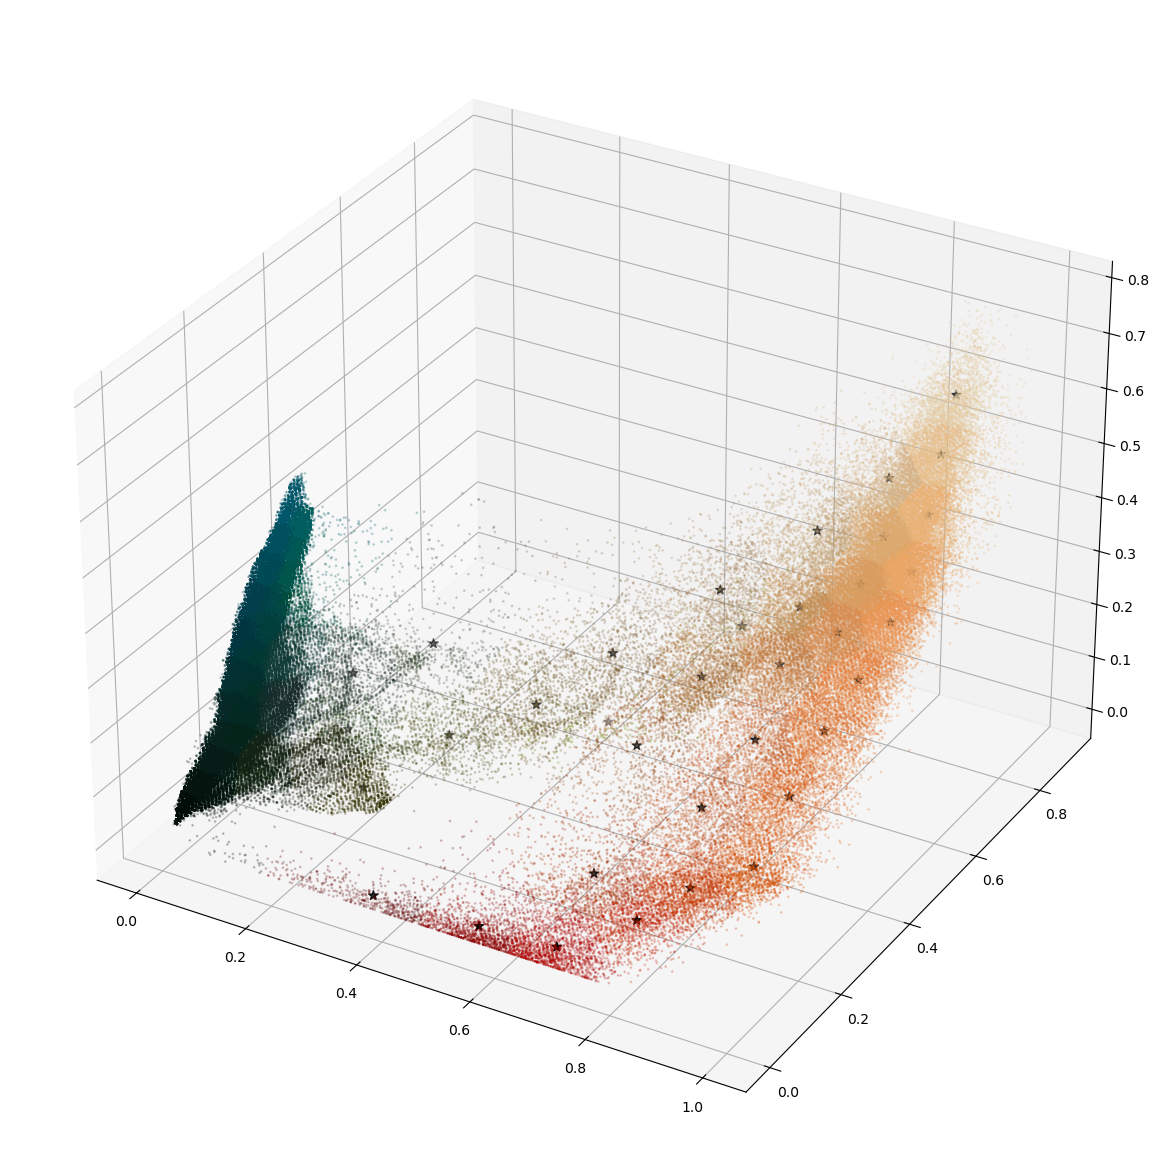

In [21]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

# ax.subplot(1,2,1)
ax.scatter(flower_vec[:,0], flower_vec[:,1], flower_vec[:,2], s = 1, 
            c = km.cluster_centers_[km.labels_], alpha = 0.2)

# ax.subplot(1,2,2)
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], s = 50, marker = '*', c = 'black')

plt.show()

In [22]:
flower_quant_vec = km.cluster_centers_[km.labels_]
flower_quant = flower_quant_vec.reshape(a, l, p)

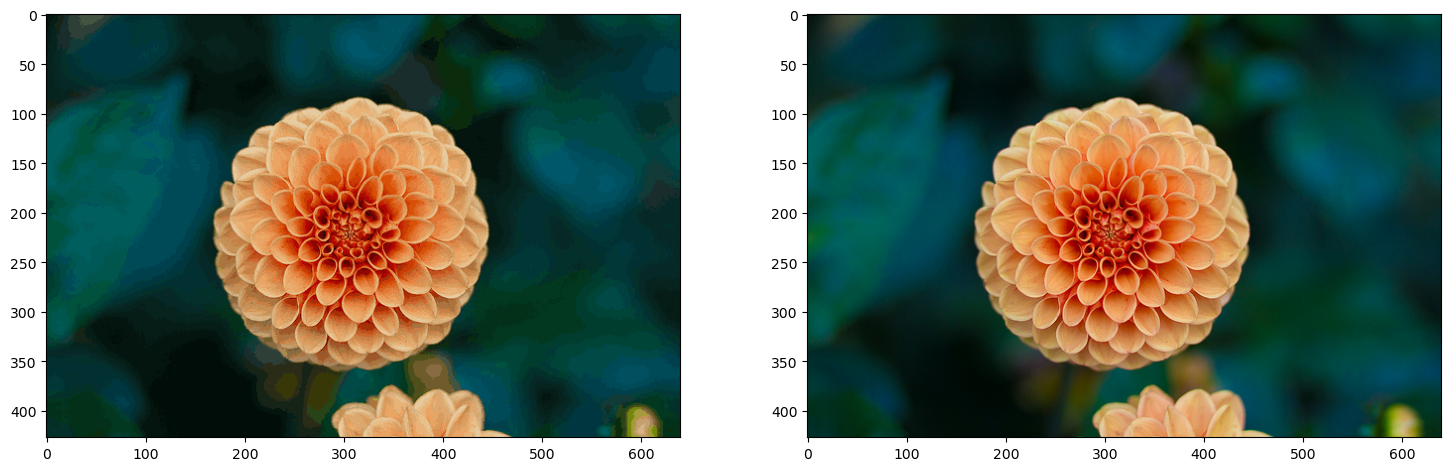

In [23]:
plt.figure(figsize = (18, 10))

plt.subplot(1,2,1)
plt.imshow(flower_quant)

plt.subplot(1,2,2)
plt.imshow(flower)

plt.show()

c:\Users\hugom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=8
  warnings.warn(


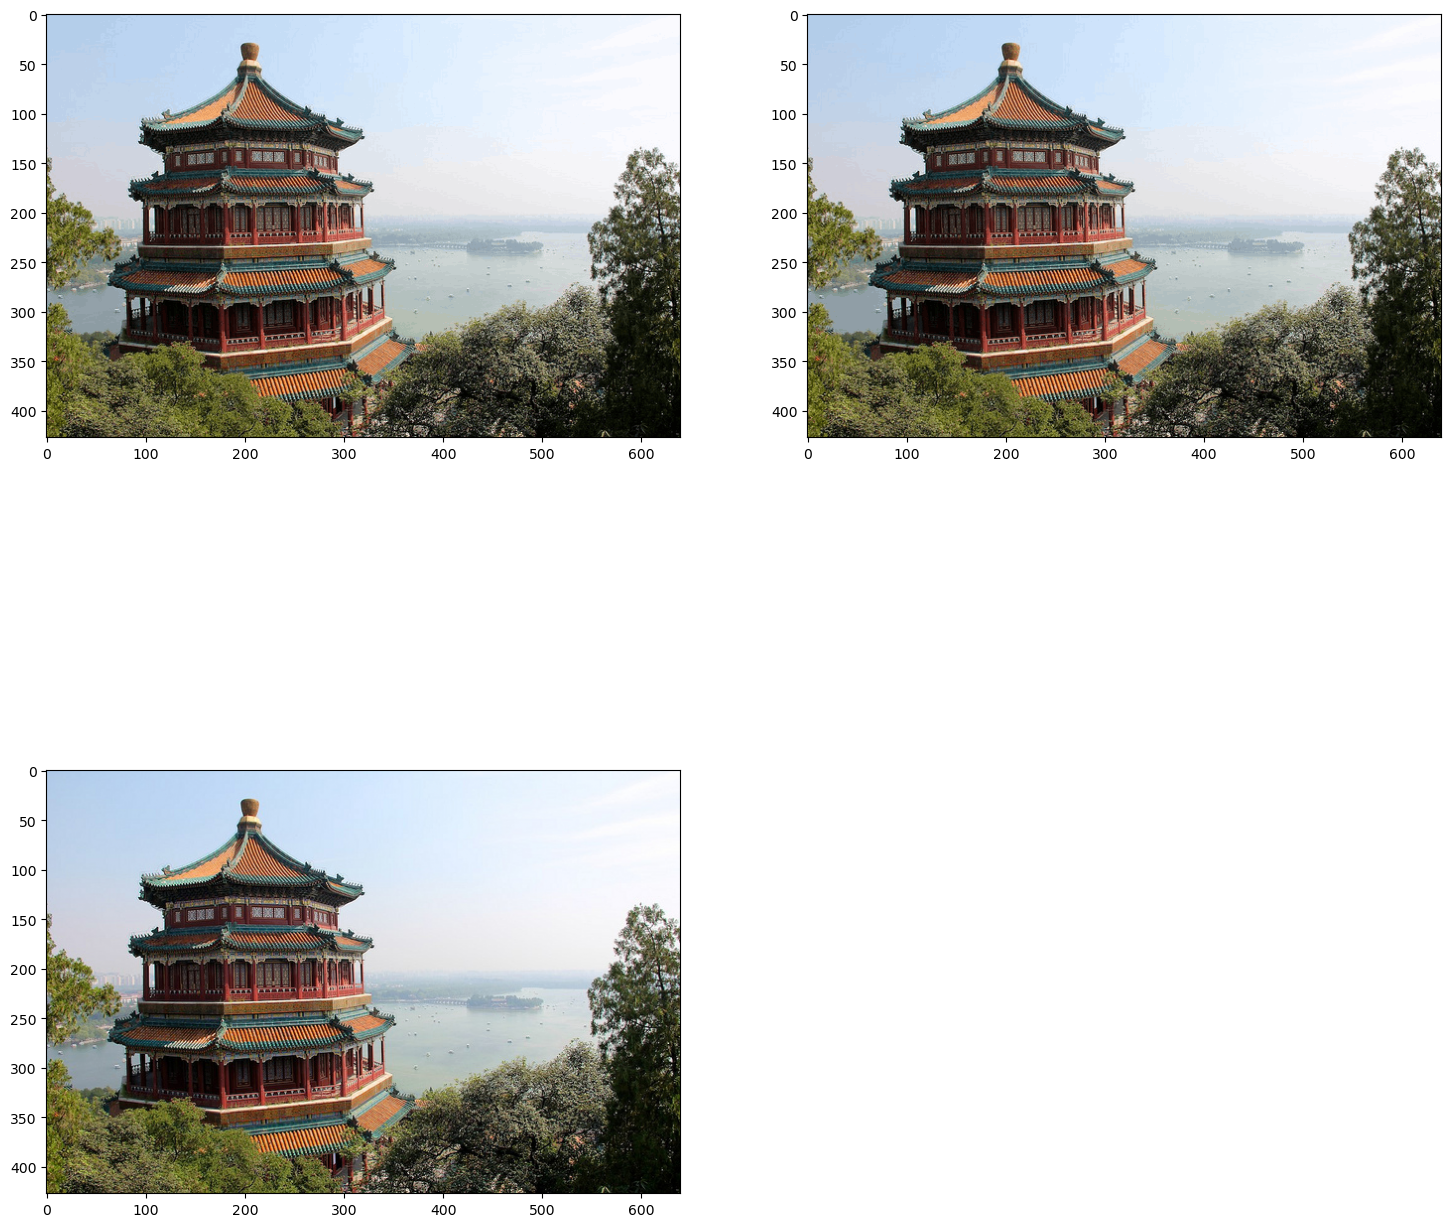

In [24]:
foto = load_sample_image('china.jpg')/255
a, l, p = foto.shape
n_colors = 256

foto_vec = np.reshape(foto, (a*l, p))

# start_time = time.time()
km = KMeans(n_clusters = n_colors)
# elapsed_time = time.time() - start_time
# time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

# start_time = time.time()
mbkm = MiniBatchKMeans(n_clusters = n_colors, batch_size = 2048)
# elapsed_time = time.time() - start_time
# time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

km.fit(foto_vec)
mbkm.fit(foto_vec)

foto_quant = km.cluster_centers_[km.labels_].reshape(a, l, p)
foto_quant_mb = mbkm.cluster_centers_[mbkm.labels_].reshape(a, l, p)

plt.figure(figsize = (18, 18))

plt.subplot(2,2,1)
plt.imshow(foto_quant)

plt.subplot(2,2,2)
plt.imshow(foto_quant_mb)

plt.subplot(2,2,3)
plt.imshow(foto)

plt.show()